In [ ]:
###  TIỀN XỬ LÝ DỮ LIỆU  ###
#1 Chuẩn hóa  (Normalize) : chuẩn hóa biên độ âm thanh về khoảng [-5,5] 
#2. Cắt bỏ khoảng lặng (Trim): loại bỏ khoảng lặng đầu/cuối
#3. Giảm nhiễu (Nosie Reduction): Loại bỏ các nhiễu nền dùng thư viện noisereduce
#4. Kéo dãn thời gian (Time Strecth) rate=0.6 
#5. Thay đổi cao độ (Pitch shift): tăng cao độ lên 0.8 
#6. Thêm nhiễu: thêm Gaussian ngẫu nhiễn tăng tính đa dạng của dữ liệu

In [6]:
# Import các thư viện cần thiết cho 6 bước xử lý âm thanh
import numpy as np
import noisereduce as nr
from IPython.display import Audio, display
import matplotlib.pyplot as plt

c:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
audio = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry\0001_000358.wav" 

In [4]:

# Kiểm tra đường dẫn 
import os
print(os.path.exists(audio))


True


In [7]:
sr = 22050 
display(Audio(audio, rate=sr))

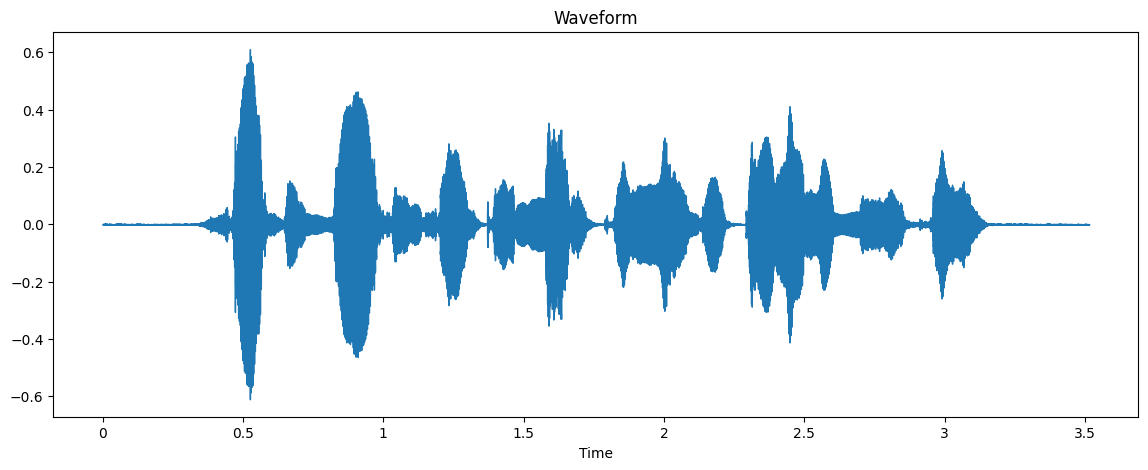

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y , sr = librosa.load(audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

In [ ]:
## Các bước tiền xử lý dữ liệu âm thanh

In [10]:
# Bước 1: Hàm chuẩn hóa amplitude về khoảng [-5, 5]
def normalize_audio(audio, target_range=5):
    """
    Chuẩn hóa amplitude của audio về khoảng [-target_range, target_range]
    """
    # Tìm giá trị max của amplitude
    max_val = np.max(np.abs(audio))
    
    # Tránh chia cho 0
    if max_val == 0:
        return audio
    
    # Chuẩn hóa về [-target_range, target_range]
    normalized_audio = (audio / max_val) * target_range
    
    return normalized_audio

print("✓ Đã định nghĩa hàm normalize_audio")

✓ Đã định nghĩa hàm normalize_audio


In [11]:
# Bước 2: Hàm cắt bỏ khoảng lặng
def trim_silence(audio, sr, top_db=20):
    """
    Cắt bỏ khoảng lặng ở đầu và cuối audio
    """
    # Trim silence từ đầu và cuối
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=top_db)
    
    return trimmed_audio

print("✓ Đã định nghĩa hàm trim_silence")

✓ Đã định nghĩa hàm trim_silence


In [12]:
# Bước 3: Hàm giảm nhiễu
def reduce_noise(audio, sr):
    """
    Giảm nhiễu nền sử dụng noisereduce
    """
    # Sử dụng noisereduce để loại bỏ noise
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    
    return reduced_noise

print("✓ Đã định nghĩa hàm reduce_noise")

✓ Đã định nghĩa hàm reduce_noise


In [13]:
# Bước 4: Hàm kéo dãn thời gian (Time Stretch)
def time_stretch(audio, rate=0.6):
    """
    Kéo dãn thời gian của audio với tỷ lệ rate
    rate < 1 sẽ làm chậm audio (kéo dài thời gian)
    rate > 1 sẽ làm nhanh audio (rút ngắn thời gian)
    """
    # Sử dụng librosa để time stretch
    stretched_audio = librosa.effects.time_stretch(audio, rate=rate)
    
    return stretched_audio

print("✓ Đã định nghĩa hàm time_stretch")

✓ Đã định nghĩa hàm time_stretch


In [14]:
# Bước 5: Hàm thay đổi cao độ (Pitch Shift)
def pitch_shift(audio, sr, n_steps=0.8):
    """
    Thay đổi cao độ của audio
    n_steps > 0: tăng cao độ
    n_steps < 0: giảm cao độ
    """
    # Sử dụng librosa để pitch shift
    shifted_audio = librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)
    
    return shifted_audio

print("✓ Đã định nghĩa hàm pitch_shift")

✓ Đã định nghĩa hàm pitch_shift


In [15]:
# Bước 6: Hàm thêm nhiễu Gaussian
def add_gaussian_noise(audio, noise_level=0.005):
    """
    Thêm nhiễu Gaussian ngẫu nhiên để tăng tính đa dạng của dữ liệu
    """
    # Tạo noise ngẫu nhiên với cùng kích thước với audio
    noise = np.random.normal(0, noise_level, audio.shape)
    
    # Thêm noise vào audio gốc
    noisy_audio = audio + noise
    
    return noisy_audio

print("✓ Đã định nghĩa hàm add_gaussian_noise")

✓ Đã định nghĩa hàm add_gaussian_noise


In [16]:
# Thực hiện 6 bước xử lý âm thanh tuần tự
print("Bắt đầu xử lý audio...")
print(f"Audio gốc - Shape: {y.shape}, Duration: {len(y)/sr:.2f}s, Min: {np.min(y):.3f}, Max: {np.max(y):.3f}")

# Khởi tạo audio để xử lý
processed_audio = y.copy()

# BƯỚC 1: Chuẩn hóa amplitude về khoảng [-5, 5]
print("\n1. Chuẩn hóa amplitude về [-5, 5]...")
processed_audio = normalize_audio(processed_audio, target_range=5)
print(f"   Sau chuẩn hóa - Min: {np.min(processed_audio):.3f}, Max: {np.max(processed_audio):.3f}")

# BƯỚC 2: Cắt bỏ khoảng lặng
print("\n2. Cắt bỏ khoảng lặng...")
before_trim_len = len(processed_audio)
processed_audio = trim_silence(processed_audio, sr, top_db=20)
print(f"   Trước trim: {before_trim_len/sr:.2f}s -> Sau trim: {len(processed_audio)/sr:.2f}s")

# BƯỚC 3: Giảm nhiễu nền
print("\n3. Giảm nhiễu nền...")
processed_audio = reduce_noise(processed_audio, sr)
print(f"   Hoàn thành giảm nhiễu - Shape: {processed_audio.shape}")

# BƯỚC 4: Kéo dãn thời gian (rate=0.6)
print("\n4. Kéo dãn thời gian với rate=0.6...")
before_stretch_len = len(processed_audio)
processed_audio = time_stretch(processed_audio, rate=0.6)
print(f"   Trước stretch: {before_stretch_len/sr:.2f}s -> Sau stretch: {len(processed_audio)/sr:.2f}s")

# BƯỚC 5: Thay đổi cao độ (tăng 0.8 semitones)
print("\n5. Thay đổi cao độ (+0.8 semitones)...")
processed_audio = pitch_shift(processed_audio, sr, n_steps=0.8)
print(f"   Hoàn thành thay đổi cao độ - Shape: {processed_audio.shape}")

# BƯỚC 6: Thêm nhiễu Gaussian
print("\n6. Thêm nhiễu Gaussian...")
processed_audio = add_gaussian_noise(processed_audio, noise_level=0.005)
print(f"   Hoàn thành thêm noise - Min: {np.min(processed_audio):.3f}, Max: {np.max(processed_audio):.3f}")

print("\n✅ HOÀN THÀNH TẤT CẢ 6 BƯỚC XỬ LÝ!")

Bắt đầu xử lý audio...
Audio gốc - Shape: (77506,), Duration: 3.52s, Min: -0.436, Max: 0.611

1. Chuẩn hóa amplitude về [-5, 5]...
   Sau chuẩn hóa - Min: -3.573, Max: 5.000

2. Cắt bỏ khoảng lặng...
   Trước trim: 3.52s -> Sau trim: 2.69s

3. Giảm nhiễu nền...
   Hoàn thành giảm nhiễu - Shape: (59392,)

4. Kéo dãn thời gian với rate=0.6...
   Trước stretch: 2.69s -> Sau stretch: 4.49s

5. Thay đổi cao độ (+0.8 semitones)...
   Hoàn thành thay đổi cao độ - Shape: (98987,)

6. Thêm nhiễu Gaussian...
   Hoàn thành thêm noise - Min: -1.311, Max: 1.121

✅ HOÀN THÀNH TẤT CẢ 6 BƯỚC XỬ LÝ!
   Trước trim: 3.52s -> Sau trim: 2.69s

3. Giảm nhiễu nền...
   Hoàn thành giảm nhiễu - Shape: (59392,)

4. Kéo dãn thời gian với rate=0.6...
   Trước stretch: 2.69s -> Sau stretch: 4.49s

5. Thay đổi cao độ (+0.8 semitones)...
   Hoàn thành thay đổi cao độ - Shape: (98987,)

6. Thêm nhiễu Gaussian...
   Hoàn thành thêm noise - Min: -1.311, Max: 1.121

✅ HOÀN THÀNH TẤT CẢ 6 BƯỚC XỬ LÝ!


In [17]:
# Lưu file audio đã xử lý
import os
from scipy.io.wavfile import write

# Tạo thư mục output nếu chưa có
output_dir = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry"
os.makedirs(output_dir, exist_ok=True)

# Tạo tên file output (thêm "_processed" vào tên gốc)
original_filename = os.path.basename(audio)
name_without_ext = os.path.splitext(original_filename)[0]
output_filename = f"{name_without_ext}_processed.wav"
output_path = os.path.join(output_dir, output_filename)

# Chuẩn hóa audio về khoảng [-1, 1] để lưu file WAV
normalized_for_save = processed_audio / np.max(np.abs(processed_audio))

# Lưu file WAV
write(output_path, sr, (normalized_for_save * 32767).astype(np.int16))

print(f"✅ Đã lưu file audio đã xử lý tại: {output_path}")
print(f"📁 Thư mục lưu trữ: {output_dir}")
print(f"🎵 Tên file: {output_filename}")

# Hiển thị thông tin file đã lưu
print(f"\n📊 Thông tin file đã lưu:")
print(f"   - Đường dẫn: {output_path}")
print(f"   - Tồn tại: {os.path.exists(output_path)}")
if os.path.exists(output_path):
    file_size = os.path.getsize(output_path)
    print(f"   - Kích thước: {file_size:,} bytes ({file_size/1024:.2f} KB)")

✅ Đã lưu file audio đã xử lý tại: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav
📁 Thư mục lưu trữ: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry
🎵 Tên file: 0001_000358_processed.wav

📊 Thông tin file đã lưu:
   - Đường dẫn: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav
   - Tồn tại: True
   - Kích thước: 198,018 bytes (193.38 KB)


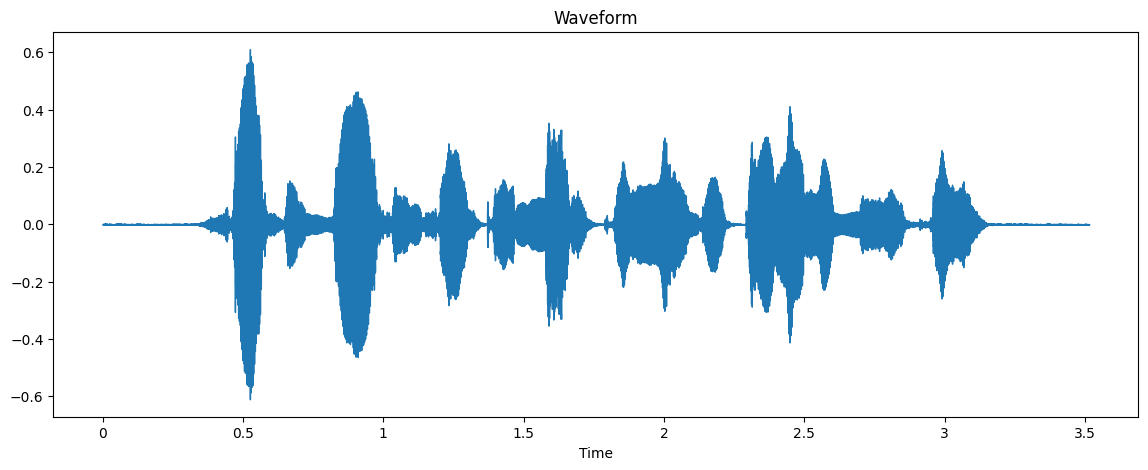

In [18]:
audio = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry\0001_000358.wav" 
sr = 22050 
y , sr = librosa.load(audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


In [19]:
audio_processed = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav" 


In [20]:
# Kiểm tra đường dẫn 
import os
print(os.path.exists(audio_processed))

True


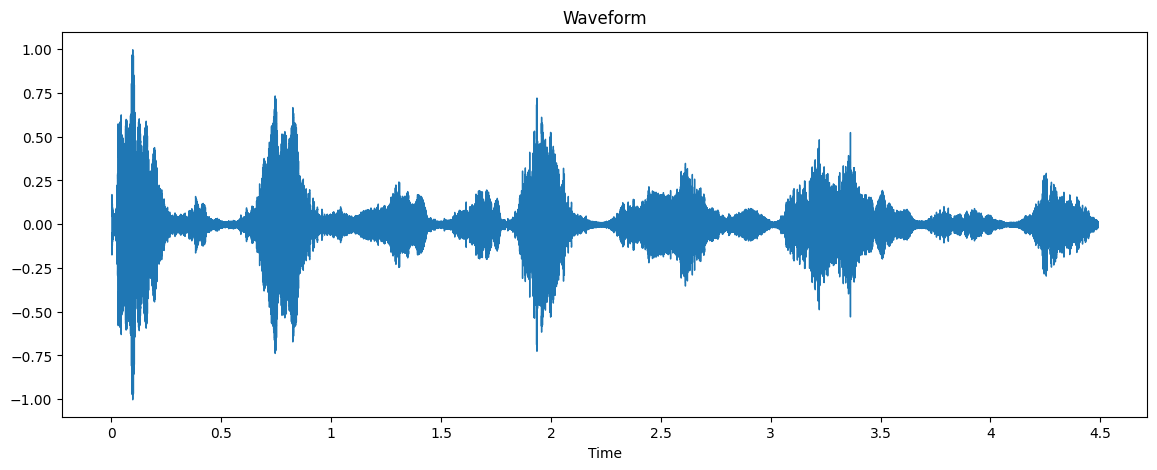

In [22]:
audio_processed = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav" 
sr = 22050 
y_processed , sr = librosa.load(audio_processed, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_processed, sr=sr)
plt.title('Waveform')
plt.show()


In [ ]:
## So sánh audio gốc và audio đã xử lý

In [ ]:
## so sánh biên độ âm 

c:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\display.py:801: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
C:\Users\MyPC\AppData\Local\Temp\ipykernel_21992\1402603491.py:28: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MyPC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MyPC\AppData\Local\Temp\ipykernel_21992\1402603491.py:28: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Roaming\Python\Python311\sit

📊 So sánh Audio:
   🎵 Audio gốc     - Duration: 3.52s, Shape: (77506,)
   🔧 Audio xử lý   - Duration: 4.49s, Shape: (98987,)
   📈 Thay đổi thời gian: +27.7%


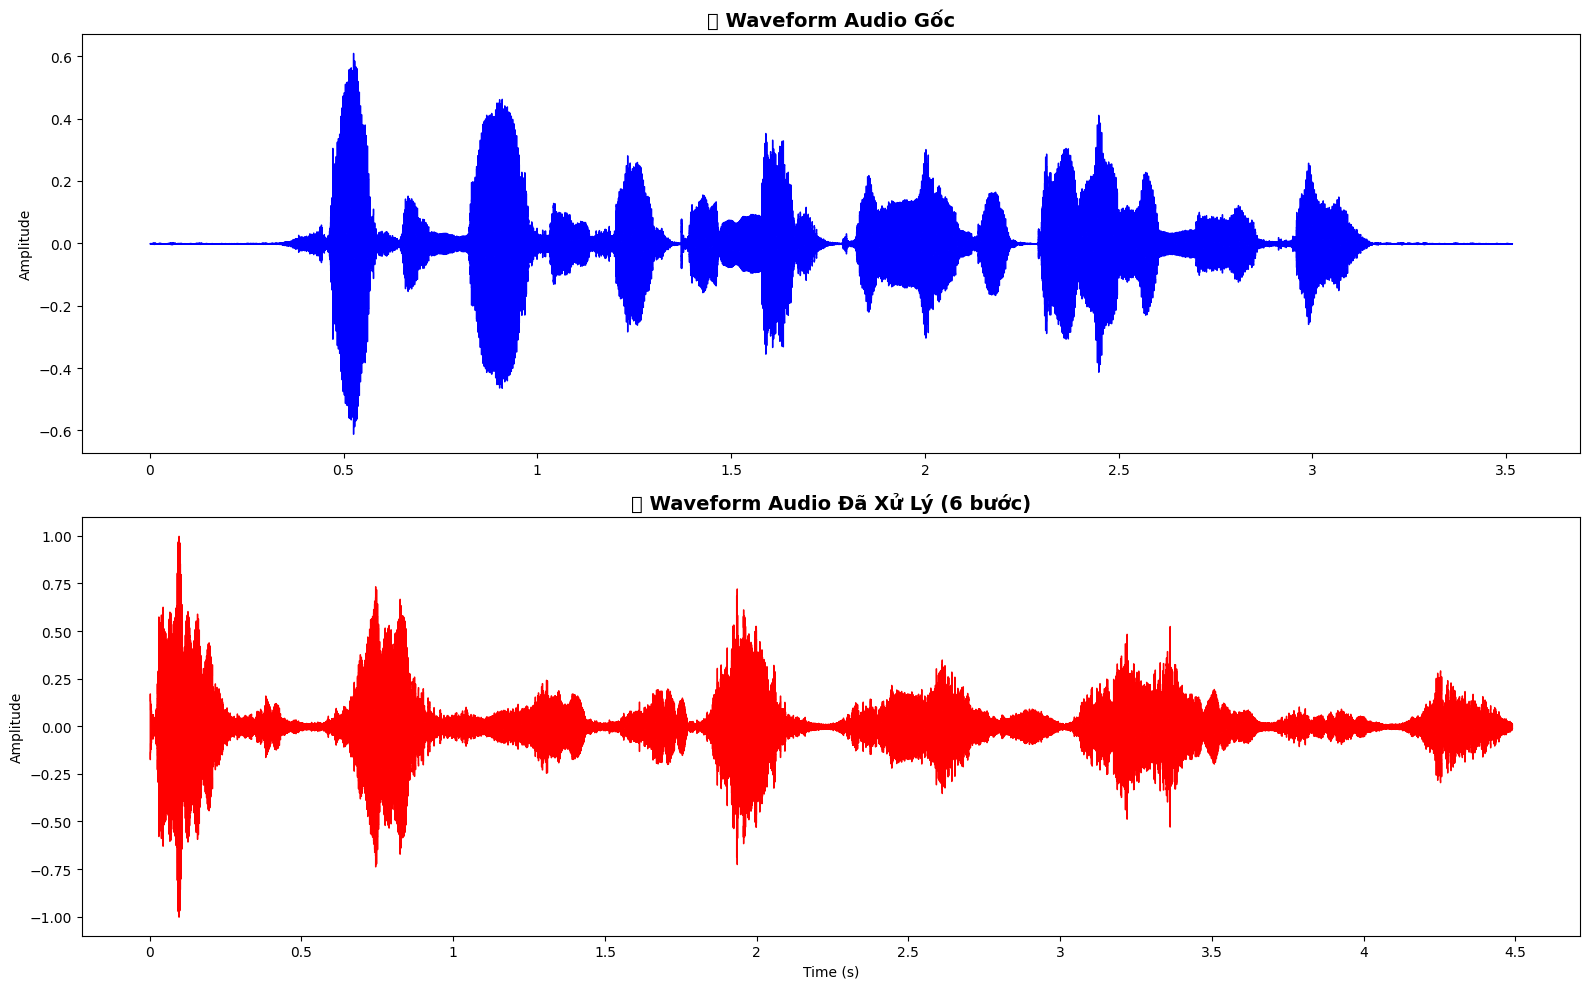

In [23]:

# Load audio gốc
audio = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry\0001_000358.wav" 
sr = 22050
y, sr = librosa.load(audio, sr=sr)

# Load audio đã xử lý
audio_processed = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav" 
y_processed, sr = librosa.load(audio_processed, sr=sr)

# Tạo subplot với 2 hình trên cùng một khung
plt.figure(figsize=(16, 10))

# Subplot 1: Audio gốc
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('🎵 Waveform Audio Gốc', fontsize=14, fontweight='bold')
plt.xlabel('')  # Bỏ xlabel cho subplot đầu
plt.ylabel('Amplitude')

# Subplot 2: Audio đã xử lý
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_processed, sr=sr, color='red')
plt.title('🔧 Waveform Audio Đã Xử Lý (6 bước)', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị thông tin so sánh
print(f"📊 So sánh Audio:")
print(f"   🎵 Audio gốc     - Duration: {len(y)/sr:.2f}s, Shape: {y.shape}")
print(f"   🔧 Audio xử lý   - Duration: {len(y_processed)/sr:.2f}s, Shape: {y_processed.shape}")
print(f"   📈 Thay đổi thời gian: {((len(y_processed) - len(y))/len(y)*100):+.1f}%")

plt.show()

In [ ]:
### Thử nghiệm

In [ ]:
## Phân tích cao độ (Pitch) của audio gốc và audio đã xử lý ()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\2070206965.py:51: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\2070206965.py:51: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


🎼 Thống kê Pitch Analysis:
   🎵 Audio gốc:
      - Pitch trung bình: 328.2 Hz
      - Pitch min: 147.0 Hz
      - Pitch max: 2802.7 Hz
   🔧 Audio xử lý:
      - Pitch trung bình: 733.1 Hz
      - Pitch min: 152.4 Hz
      - Pitch max: 3964.7 Hz
      - Tỷ lệ thay đổi pitch: 2.234 (+123.4%)


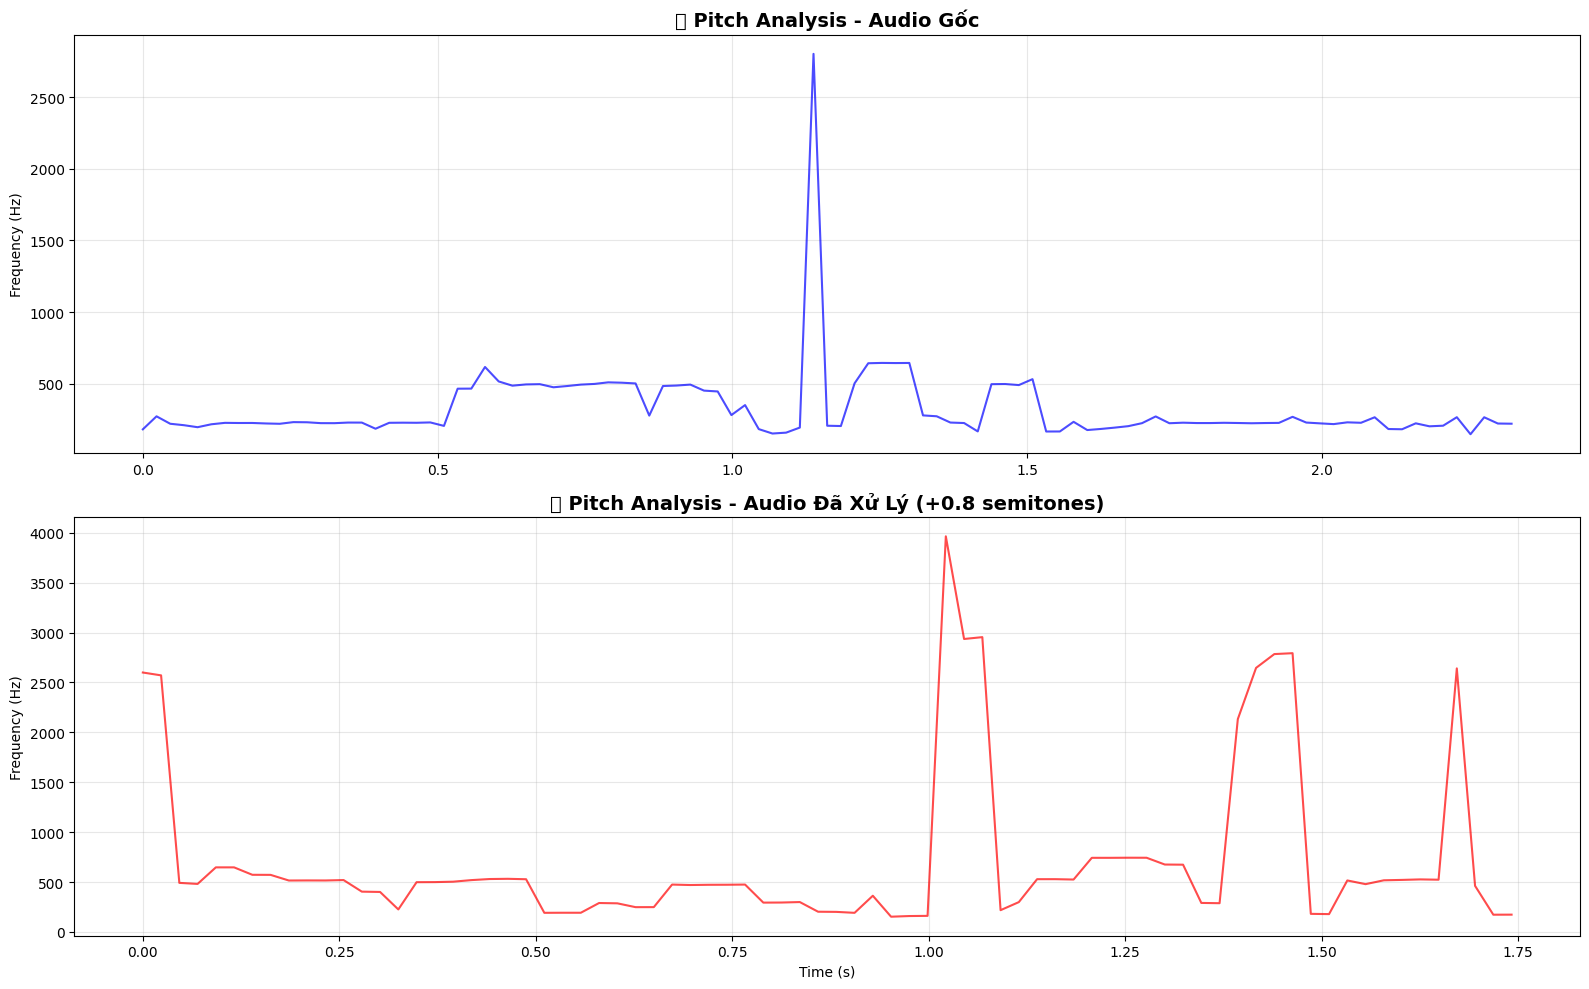

In [42]:
# Phân tích cao độ (Pitch) của audio gốc và audio đã xử lý
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Tính toán pitch cho audio gốc
pitches_original, magnitudes_original = librosa.piptrack(y=y, sr=sr, threshold=0.1)
pitch_original = []
for t in range(pitches_original.shape[1]):
    index = magnitudes_original[:, t].argmax()
    pitch = pitches_original[index, t]
    pitch_original.append(pitch)

# Tính toán pitch cho audio đã xử lý
pitches_processed, magnitudes_processed = librosa.piptrack(y=y_processed, sr=sr, threshold=0.1)
pitch_processed = []
for t in range(pitches_processed.shape[1]):
    index = magnitudes_processed[:, t].argmax()
    pitch = pitches_processed[index, t]
    pitch_processed.append(pitch)

# Tạo time axis
time_original = librosa.frames_to_time(np.arange(len(pitch_original)), sr=sr)
time_processed = librosa.frames_to_time(np.arange(len(pitch_processed)), sr=sr)

# Vẽ biểu đồ pitch
plt.figure(figsize=(16, 10))

# Subplot 1: Pitch của audio gốc
plt.subplot(2, 1, 1)
# Chỉ hiển thị pitch > 0 (loại bỏ khoảng lặng)
pitch_original_filtered = np.array(pitch_original)
pitch_original_filtered[pitch_original_filtered == 0] = np.nan
plt.plot(time_original, pitch_original_filtered, 'b-', linewidth=1.5, alpha=0.7)
plt.title('🎵 Pitch Analysis - Audio Gốc', fontsize=14, fontweight='bold')
plt.ylabel('Frequency (Hz)')
plt.grid(True, alpha=0.3)

# Subplot 2: Pitch của audio đã xử lý
plt.subplot(2, 1, 2)
# Chỉ hiển thị pitch > 0 (loại bỏ khoảng lặng)
pitch_processed_filtered = np.array(pitch_processed)
pitch_processed_filtered[pitch_processed_filtered == 0] = np.nan
plt.plot(time_processed, pitch_processed_filtered, 'r-', linewidth=1.5, alpha=0.7)
plt.title('🔧 Pitch Analysis - Audio Đã Xử Lý (+0.8 semitones)', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Tính toán thống kê pitch
original_valid_pitch = pitch_original_filtered[~np.isnan(pitch_original_filtered)]
processed_valid_pitch = pitch_processed_filtered[~np.isnan(pitch_processed_filtered)]

print(f"🎼 Thống kê Pitch Analysis:")
if len(original_valid_pitch) > 0:
    print(f"   🎵 Audio gốc:")
    print(f"      - Pitch trung bình: {np.mean(original_valid_pitch):.1f} Hz")
    print(f"      - Pitch min: {np.min(original_valid_pitch):.1f} Hz")
    print(f"      - Pitch max: {np.max(original_valid_pitch):.1f} Hz")

if len(processed_valid_pitch) > 0:
    print(f"   🔧 Audio xử lý:")
    print(f"      - Pitch trung bình: {np.mean(processed_valid_pitch):.1f} Hz")
    print(f"      - Pitch min: {np.min(processed_valid_pitch):.1f} Hz")
    print(f"      - Pitch max: {np.max(processed_valid_pitch):.1f} Hz")
    
    if len(original_valid_pitch) > 0:
        pitch_change_ratio = np.mean(processed_valid_pitch) / np.mean(original_valid_pitch)
        print(f"      - Tỷ lệ thay đổi pitch: {pitch_change_ratio:.3f} ({(pitch_change_ratio-1)*100:+.1f}%)")

plt.show()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\3644684230.py:32: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\3644684230.py:32: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


🎼 Thống kê Fundamental Frequency (F0):
   🎵 Audio gốc - F0 trung bình: 143.8 Hz
   🔧 Audio xử lý - F0 trung bình: 191.2 Hz
   📈 Thay đổi F0: +33.0%


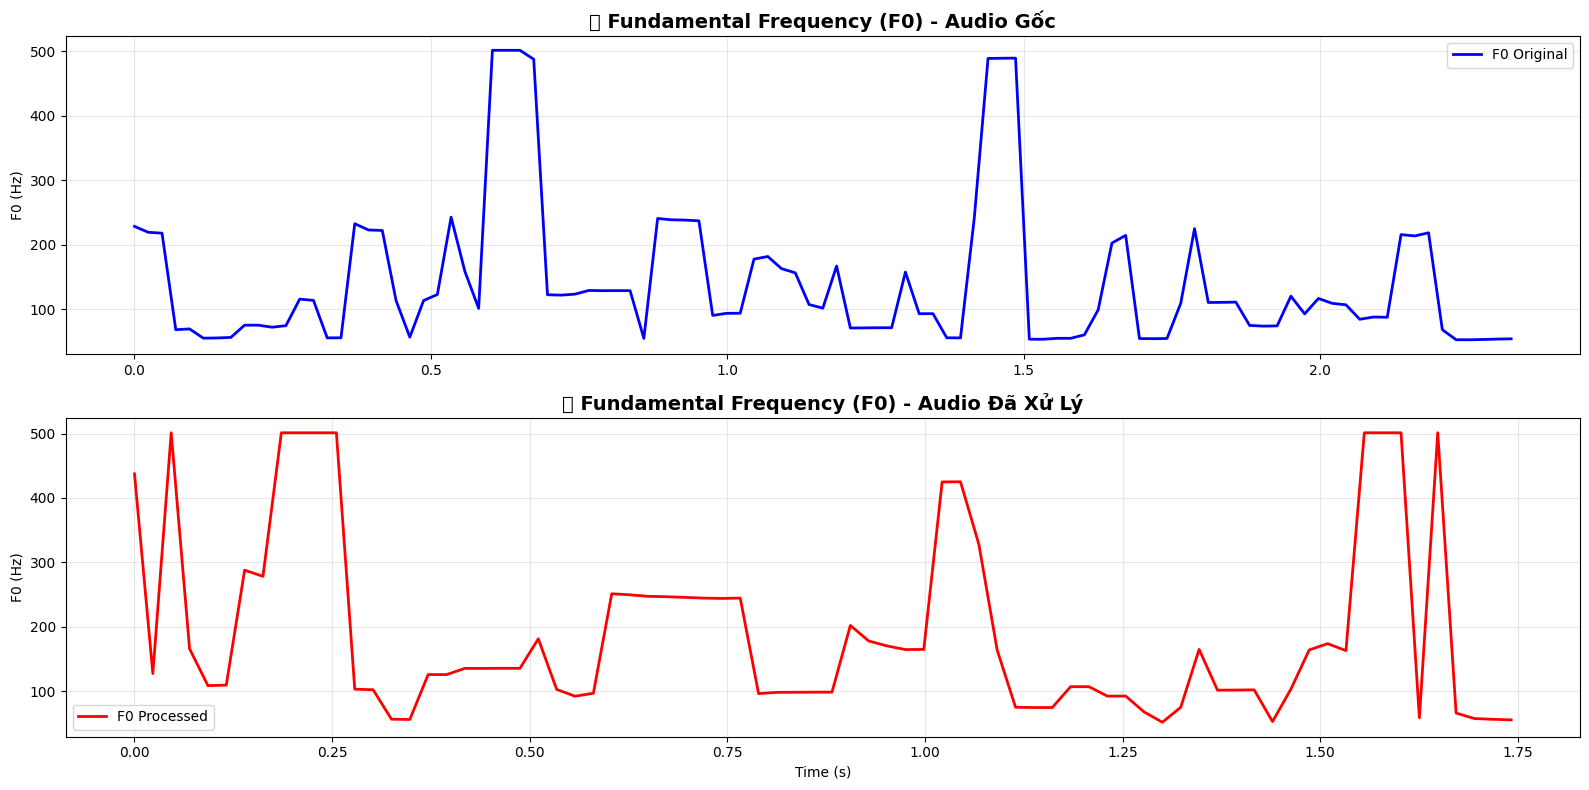

In [43]:
# Phương pháp đơn giản hơn để xem pitch sử dụng librosa.yin (YIN algorithm)
import matplotlib.pyplot as plt
import librosa
import numpy as np

# Tính F0 (fundamental frequency) cho audio gốc
f0_original = librosa.yin(y, sr=sr, fmin=50, fmax=500)  # Giới hạn tần số cho giọng nói
f0_processed = librosa.yin(y_processed, sr=sr, fmin=50, fmax=500)

# Tạo time axis
time_original = librosa.frames_to_time(np.arange(len(f0_original)), sr=sr)
time_processed = librosa.frames_to_time(np.arange(len(f0_processed)), sr=sr)

# Vẽ biểu đồ F0
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(time_original, f0_original, 'b-', linewidth=2, label='F0 Original')
plt.title('🎵 Fundamental Frequency (F0) - Audio Gốc', fontsize=14, fontweight='bold')
plt.ylabel('F0 (Hz)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_processed, f0_processed, 'r-', linewidth=2, label='F0 Processed')
plt.title('🔧 Fundamental Frequency (F0) - Audio Đã Xử Lý', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('F0 (Hz)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()

# Thống kê F0
print(f"🎼 Thống kê Fundamental Frequency (F0):")
print(f"   🎵 Audio gốc - F0 trung bình: {np.mean(f0_original):.1f} Hz")
print(f"   🔧 Audio xử lý - F0 trung bình: {np.mean(f0_processed):.1f} Hz")
print(f"   📈 Thay đổi F0: {((np.mean(f0_processed) - np.mean(f0_original))/np.mean(f0_original)*100):+.1f}%")

plt.show()

In [ ]:
## Làm với dạng 1 danh sách nhiều file trong 1 folder Crema\angry

In [48]:
# Bước 1: Lấy danh sách tất cả file .wav trong thư mục Crema/angry
import os
import glob
from pathlib import Path

# Đường dẫn thư mục chứa file audio gốc
input_folder = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry"
output_folder = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry"

# Lấy danh sách tất cả file .wav
audio_files = glob.glob(os.path.join(input_folder, "*.wav"))

print(f"📁 Thư mục input: {input_folder}")
print(f"📂 Thư mục output: {output_folder}")
print(f"🎵 Tìm thấy {len(audio_files)} file .wav:")

# Hiển thị 10 file đầu tiên
for i, file_path in enumerate(audio_files[:10]):
    filename = os.path.basename(file_path)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"   {i+1:2d}. {filename} ({file_size:.1f} KB)")

if len(audio_files) > 10:
    print(f"   ... và {len(audio_files) - 10} file khác")

# Tạo thư mục output nếu chưa có
os.makedirs(output_folder, exist_ok=True)
print(f"\n✅ Đã chuẩn bị thư mục output: {output_folder}")

📁 Thư mục input: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry
📂 Thư mục output: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry
🎵 Tìm thấy 82 file .wav:
    1. 0001_000358.wav (109.9 KB)
    2. 0001_000359.wav (100.9 KB)
    3. 0001_000361.wav (101.4 KB)
    4. 0001_000364.wav (113.4 KB)
    5. 0001_000366.wav (86.6 KB)
    6. 0001_000367.wav (86.9 KB)
    7. 0001_000370.wav (88.3 KB)
    8. 0001_000373.wav (99.4 KB)
    9. 0001_000374.wav (124.7 KB)
   10. 0001_000375.wav (97.8 KB)
   ... và 72 file khác

✅ Đã chuẩn bị thư mục output: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry


In [49]:
# Bước 2: Function xử lý hàng loạt - áp dụng 6 bước cho từng file
import time
from scipy.io.wavfile import write

def process_single_audio_file(input_path, output_path, sr=22050):
    """
    Xử lý 1 file audio với 6 bước và lưu kết quả
    """
    try:
        # Load audio
        y, sr = librosa.load(input_path, sr=sr)
        
        # Áp dụng 6 bước xử lý tuần tự
        processed_audio = y.copy()
        
        # Bước 1: Chuẩn hóa
        processed_audio = normalize_audio(processed_audio, target_range=5)
        
        # Bước 2: Trim silence
        processed_audio = trim_silence(processed_audio, sr, top_db=20)
        
        # Bước 3: Giảm nhiễu
        processed_audio = reduce_noise(processed_audio, sr)
        
        # Bước 4: Time stretch
        processed_audio = time_stretch(processed_audio, rate=0.6)
        
        # Bước 5: Pitch shift
        processed_audio = pitch_shift(processed_audio, sr, n_steps=0.8)
        
        # Bước 6: Thêm Gaussian noise
        processed_audio = add_gaussian_noise(processed_audio, noise_level=0.005)
        
        # Chuẩn hóa để lưu file
        normalized_for_save = processed_audio / np.max(np.abs(processed_audio))
        
        # Lưu file
        write(output_path, sr, (normalized_for_save * 32767).astype(np.int16))
        
        return {
            'status': 'success',
            'original_duration': len(y) / sr,
            'processed_duration': len(processed_audio) / sr,
            'file_size': os.path.getsize(output_path) / 1024  # KB
        }
        
    except Exception as e:
        return {
            'status': 'error',
            'error': str(e)
        }

def batch_process_audio_files(audio_files, input_folder, output_folder):
    """
    Xử lý hàng loạt nhiều file audio
    """
    results = []
    successful = 0
    failed = 0
    
    print(f"🚀 Bắt đầu xử lý {len(audio_files)} file audio...")
    print("=" * 60)
    
    start_time = time.time()
    
    for i, input_path in enumerate(audio_files):
        # Tạo đường dẫn output
        filename = os.path.basename(input_path)
        name_without_ext = os.path.splitext(filename)[0]
        output_filename = f"{name_without_ext}_processed.wav"
        output_path = os.path.join(output_folder, output_filename)
        
        # Kiểm tra nếu file đã xử lý
        if os.path.exists(output_path):
            print(f"⏭️  {i+1:2d}/{len(audio_files)} - {filename} - Đã tồn tại, bỏ qua")
            continue
        
        print(f"🔄 {i+1:2d}/{len(audio_files)} - Đang xử lý: {filename}")
        
        # Xử lý file
        result = process_single_audio_file(input_path, output_path)
        result['filename'] = filename
        result['input_path'] = input_path
        result['output_path'] = output_path
        results.append(result)
        
        if result['status'] == 'success':
            successful += 1
            duration_change = ((result['processed_duration'] - result['original_duration']) 
                             / result['original_duration'] * 100)
            print(f"   ✅ Thành công - {result['original_duration']:.2f}s → {result['processed_duration']:.2f}s ({duration_change:+.1f}%)")
        else:
            failed += 1
            print(f"   ❌ Lỗi: {result['error']}")
        
        # Hiển thị tiến trình
        progress = (i + 1) / len(audio_files) * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i + 1) * len(audio_files) - elapsed
        print(f"   📊 Tiến trình: {progress:.1f}% - ETA: {eta:.1f}s")
        print("-" * 50)
    
    total_time = time.time() - start_time
    
    print(f"\n🎉 HOÀN THÀNH XỬ LÝ HÀNG LOẠT!")
    print(f"   ✅ Thành công: {successful} file")
    print(f"   ❌ Thất bại: {failed} file")
    print(f"   ⏱️  Tổng thời gian: {total_time:.2f}s")
    print(f"   ⚡ Trung bình: {total_time/len(audio_files):.2f}s/file")
    
    return results

print("✓ Đã định nghĩa các function xử lý hàng loạt")

✓ Đã định nghĩa các function xử lý hàng loạt


In [50]:
# Bước 3: Thực hiện xử lý hàng loạt tất cả file
# Có thể chọn xử lý một số file để test trước
TEST_MODE = True  # Đặt True để test với 3 file đầu, False để xử lý tất cả

if TEST_MODE:
    # Chỉ xử lý 3 file đầu để test
    files_to_process = audio_files[:3]
    print(f"🧪 TEST MODE: Chỉ xử lý {len(files_to_process)} file đầu tiên")
else:
    # Xử lý tất cả file
    files_to_process = audio_files
    print(f"🚀 FULL MODE: Xử lý tất cả {len(files_to_process)} file")

print(f"📋 Danh sách file sẽ xử lý:")
for i, file_path in enumerate(files_to_process):
    print(f"   {i+1}. {os.path.basename(file_path)}")

print(f"\n⚠️  CHÚ Ý: Quá trình này có thể mất khá lâu!")
print(f"   - Ước tính: {len(files_to_process) * 30:.0f}s - {len(files_to_process) * 60:.0f}s")
print(f"   - Mỗi file cần khoảng 30-60s để xử lý")

# Bắt đầu xử lý
results = batch_process_audio_files(files_to_process, input_folder, output_folder)

🧪 TEST MODE: Chỉ xử lý 3 file đầu tiên
📋 Danh sách file sẽ xử lý:
   1. 0001_000358.wav
   2. 0001_000359.wav
   3. 0001_000361.wav

⚠️  CHÚ Ý: Quá trình này có thể mất khá lâu!
   - Ước tính: 90s - 180s
   - Mỗi file cần khoảng 30-60s để xử lý
🚀 Bắt đầu xử lý 3 file audio...
🔄  1/3 - Đang xử lý: 0001_000358.wav
   ✅ Thành công - 3.52s → 4.49s (+27.7%)
   📊 Tiến trình: 33.3% - ETA: 0.3s
--------------------------------------------------
🔄  2/3 - Đang xử lý: 0001_000359.wav
   ✅ Thành công - 3.23s → 4.14s (+28.3%)
   📊 Tiến trình: 66.7% - ETA: 0.1s
--------------------------------------------------
🔄  3/3 - Đang xử lý: 0001_000361.wav
   ✅ Thành công - 3.24s → 4.18s (+28.8%)
   📊 Tiến trình: 100.0% - ETA: 0.0s
--------------------------------------------------

🎉 HOÀN THÀNH XỬ LÝ HÀNG LOẠT!
   ✅ Thành công: 3 file
   ❌ Thất bại: 0 file
   ⏱️  Tổng thời gian: 0.35s
   ⚡ Trung bình: 0.12s/file


📊 THỐNG KÊ CHI TIẾT:
✅ File xử lý thành công: 3
❌ File xử lý thất bại: 0
📈 Tỷ lệ thành công: 100.0%

⏱️  THỜI GIAN XỬ LÝ:
   - Duration gốc trung bình: 3.33s
   - Duration sau xử lý trung bình: 4.27s
   - Thay đổi thời gian trung bình: 28.3%

📁 KÍCH THƯỚC FILE:
   - Kích thước trung bình: 183.9 KB
   - Tổng dung lượng: 551.8 KB (0.5 MB)


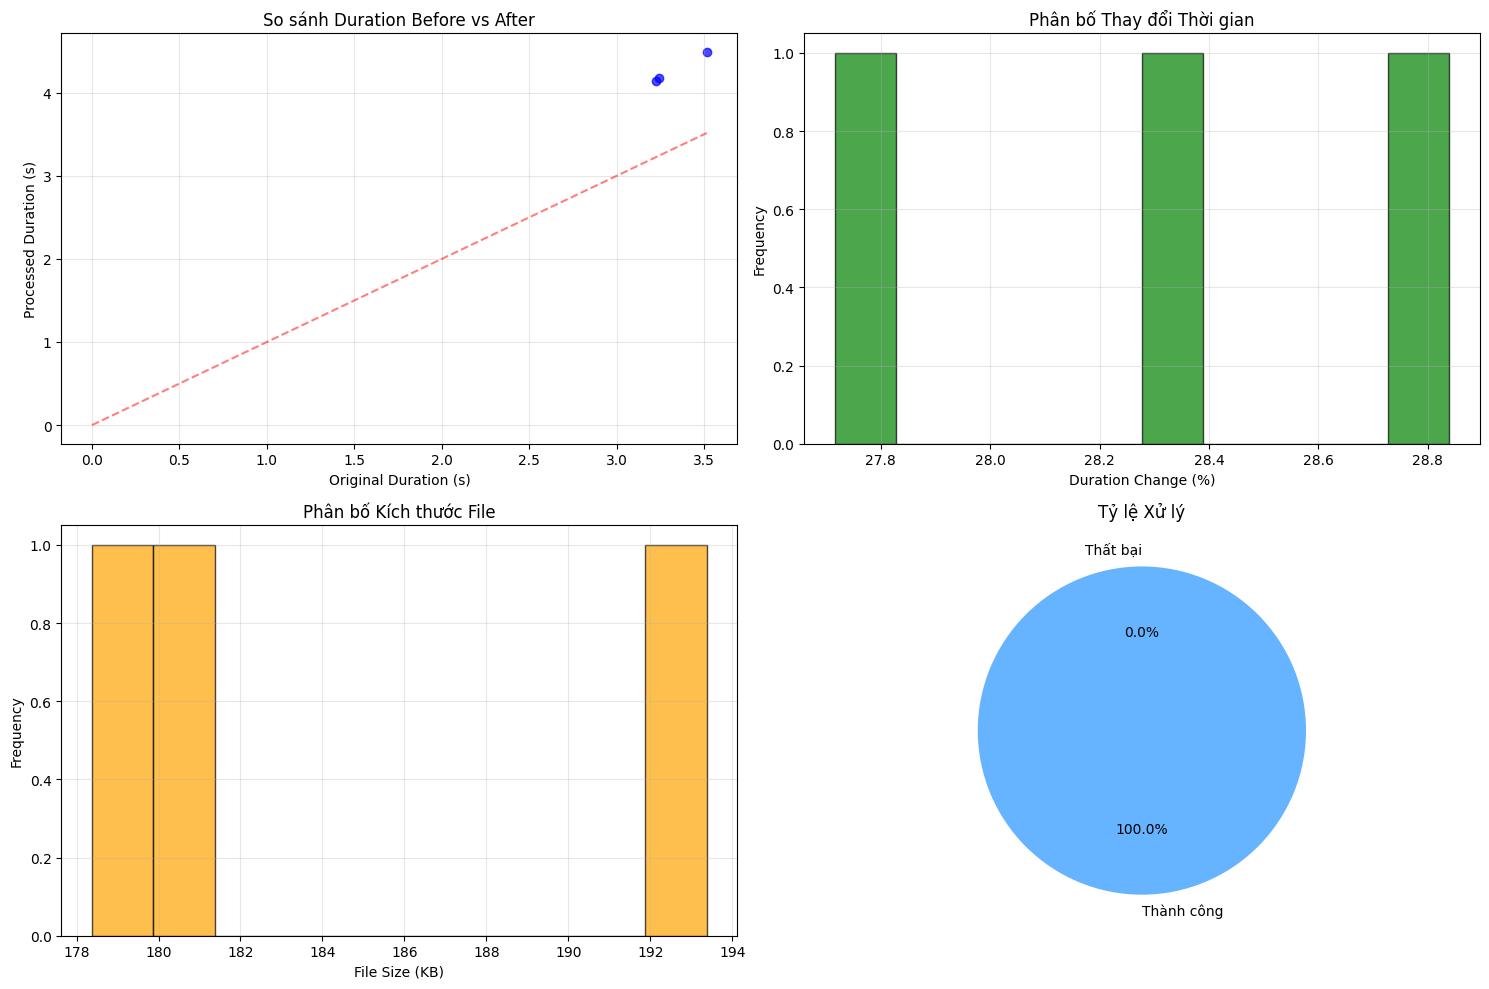


📋 CHI TIẾT 5 FILE ĐẦU TIÊN:
   1. 0001_000358.wav
      Duration: 3.52s → 4.49s
      Size: 193.4 KB
   2. 0001_000359.wav
      Duration: 3.23s → 4.14s
      Size: 178.4 KB
   3. 0001_000361.wav
      Duration: 3.24s → 4.18s
      Size: 180.0 KB

🎯 HOÀN THÀNH TOÀN BỘ QUÁ TRÌNH XỬ LÝ HÀNG LOẠT!
📂 Kết quả được lưu tại: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry


In [51]:
# Bước 4: Báo cáo kết quả và thống kê chi tiết
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame từ kết quả để phân tích
successful_results = [r for r in results if r['status'] == 'success']
failed_results = [r for r in results if r['status'] == 'error']

if successful_results:
    df_results = pd.DataFrame(successful_results)
    
    print(f"📊 THỐNG KÊ CHI TIẾT:")
    print(f"=" * 50)
    print(f"✅ File xử lý thành công: {len(successful_results)}")
    print(f"❌ File xử lý thất bại: {len(failed_results)}")
    print(f"📈 Tỷ lệ thành công: {len(successful_results)/(len(results))*100:.1f}%")
    
    print(f"\n⏱️  THỜI GIAN XỬ LÝ:")
    print(f"   - Duration gốc trung bình: {df_results['original_duration'].mean():.2f}s")
    print(f"   - Duration sau xử lý trung bình: {df_results['processed_duration'].mean():.2f}s")
    print(f"   - Thay đổi thời gian trung bình: {((df_results['processed_duration'] - df_results['original_duration']) / df_results['original_duration'] * 100).mean():.1f}%")
    
    print(f"\n📁 KÍCH THƯỚC FILE:")
    print(f"   - Kích thước trung bình: {df_results['file_size'].mean():.1f} KB")
    print(f"   - Tổng dung lượng: {df_results['file_size'].sum():.1f} KB ({df_results['file_size'].sum()/1024:.1f} MB)")
    
    # Vẽ biểu đồ thống kê
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Biểu đồ 1: So sánh duration
    axes[0, 0].scatter(df_results['original_duration'], df_results['processed_duration'], alpha=0.7, color='blue')
    axes[0, 0].plot([0, df_results['original_duration'].max()], [0, df_results['original_duration'].max()], 'r--', alpha=0.5)
    axes[0, 0].set_xlabel('Original Duration (s)')
    axes[0, 0].set_ylabel('Processed Duration (s)')
    axes[0, 0].set_title('So sánh Duration Before vs After')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Biểu đồ 2: Histogram thay đổi thời gian
    duration_change = ((df_results['processed_duration'] - df_results['original_duration']) 
                      / df_results['original_duration'] * 100)
    axes[0, 1].hist(duration_change, bins=10, alpha=0.7, color='green', edgecolor='black')
    axes[0, 1].set_xlabel('Duration Change (%)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Phân bố Thay đổi Thời gian')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Biểu đồ 3: File size distribution
    axes[1, 0].hist(df_results['file_size'], bins=10, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 0].set_xlabel('File Size (KB)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Phân bố Kích thước File')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Biểu đồ 4: Processing success rate
    labels = ['Thành công', 'Thất bại']
    sizes = [len(successful_results), len(failed_results)]
    colors = ['#66b3ff', '#ff9999']
    axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Tỷ lệ Xử lý')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📋 CHI TIẾT 5 FILE ĐẦU TIÊN:")
    for i, result in enumerate(successful_results[:5]):
        print(f"   {i+1}. {result['filename']}")
        print(f"      Duration: {result['original_duration']:.2f}s → {result['processed_duration']:.2f}s")
        print(f"      Size: {result['file_size']:.1f} KB")

if failed_results:
    print(f"\n❌ FILE XỬ LÝ THẤT BẠI:")
    for i, result in enumerate(failed_results):
        print(f"   {i+1}. {result['filename']} - Lỗi: {result['error']}")

print(f"\n🎯 HOÀN THÀNH TOÀN BỘ QUÁ TRÌNH XỬ LÝ HÀNG LOẠT!")
print(f"📂 Kết quả được lưu tại: {output_folder}")